In [1]:
cd /Users/Lin/Dropbox/Data\ science/Coursera\ machine\ learning/machine-learning-ex2/ex2    

/Users/Lin/Dropbox/Data science/Coursera machine learning/machine-learning-ex2/ex2


In [2]:
import pandas as pd
import scipy as sp
import seaborn as sns
import sklearn as sk

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn import preprocessing

##Part 1: exam scores

In [4]:
data = pd.read_csv("ex2data1.txt", header = None)


In [5]:
data.columns = ["exam1","exam2","label"]


In [6]:
data.head()

,exam1,exam2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
X = data.iloc[:,:2]


In [8]:
X.head()


,exam1,exam2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [9]:
y = data["label"]
y.head()


0    0
1    0
2    0
3    1
4    1
Name: label, dtype: int64

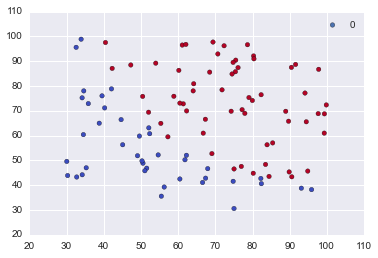

In [10]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=plt.cm.coolwarm)
legend(list(y))
# This is a scatterplot made using matplotlib. I can't work out how to put a legend on this 

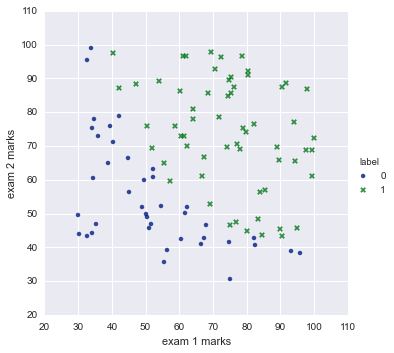

In [64]:
g = sns.lmplot("exam1", "exam2", hue="label", data=data, fit_reg=False, palette = "dark", markers = ["o","x"], legend = True)
plt.xlabel("exam 1 marks")
plt.ylabel("exam 2 marks")
savefig("scatter1.png",dpi=1200)

In [12]:
# make a sigmoid (hypothesis) function that will generate logistic regression hypotheses when passed values of 'z'
#he hypothesis value is the probability that y=1 on input x.
# the function also needs to work for matrices
def sigmoid(z):
    g = np.array([z]).flatten()
    g =  1/(1+(np.e**-g)) # use vectorisation rather than a for loop to make this calculation more efficient
    return g

In [13]:
#check that sigmoid function is working - if it's working correctly sigmoid(0) = 0.5
sigmoid(0)


array([ 0.5])

In [14]:
#check that vectors can be passed to sigmoid
sigmoid(np.array([0,1,2,3000]))


array([ 0.5       ,  0.73105858,  0.88079708,  1.        ])

In [15]:
sigmoid

<function __main__.sigmoid>

In [16]:
#add a column of ones to the feature matrix X to account for theta 0
m = len(y)
X.insert(0, "theta zero",value =pd.Series(np.ones([m])))
X.head()


,theta zero,exam1,exam2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


In [17]:
#initiate values for the vector theta 
initial_theta = np.zeros([3, 1])
hypothesis = sigmoid(X.dot(initial_theta).T)
hypothesis


array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5])

In [18]:
initial_theta

array([[ 0.],
       [ 0.],
       [ 0.]])

In [19]:
#define a function that computes the cost function for logistic regression
# so here we interpret  the cost as 'how expensive was our mistake?'. 
# e.g. If our hypothesis predicts with certainty that y=1
# but y actually turns out to be 0, this is a very costly mistake. 

def costJ(theta, X, y):
    m = len(y)
    hypothesis = sigmoid(X.dot(theta).T)
    
    #this is the cost function for linear regression
    J = -np.sum(y*np.log(hypothesis)+(1-y)*log(1-hypothesis))/m
    
    return J

def gradient(theta,X,y):
    #this returns a vector, which is the gradient of the cost function (partial derivatives of the cost function)
    m = len(y)
    hypothesis = sigmoid(X.dot(theta).T)
    error = hypothesis-y
    
    gradient = []
    for i in range(len(X.columns)):
        gradient.append(np.sum(error*(X.iloc[:,i]))/m)
    return gradient


In [20]:
costJ(initial_theta,X,y)

0.6931471805599458

In [21]:
gradient(initial_theta,X,y)

[-0.1, -12.009216589291148, -11.262842205513591]

In [22]:
#optimise values of theta using scipy's minimize function
Result = sp.optimize.minimize(fun = costJ, x0 = initial_theta, args = (X,y), method = 'TNC', jac=gradient)
Result.x


array([-25.87336646,   0.21193525,   0.20722437])

In [23]:
#Test cost function using minimum values of theta
costJ(Result.x,X,y)

0.20357130532247558

(30, 100)

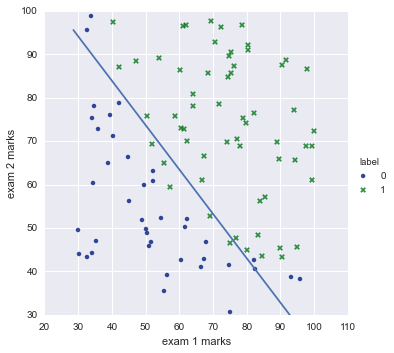

In [24]:
g = sns.lmplot("exam1", "exam2", hue="label", data=data, fit_reg=False, palette = "dark", markers = ["o","x"], legend = True)
plt.xlabel("exam 1 marks")
plt.ylabel("exam 2 marks")
plot_x = np.array([min(X.iloc[:,2])-2,  max(X.iloc[:,2])+2])
plot_y = (-1./Result.x[2])*(Result.x[1]*plot_x + Result.x[0])
plt.plot(plot_x,plot_y)
plt.ylim(30,100)

In [25]:
a = np.array([1,45,85])
hypothesis = sigmoid(a.dot(Result.x))
hypothesis


array([ 0.78207366])

In [26]:
def predict(theta, X):
    p_1 = sigmoid(X.dot(theta))
    return (p_1 >= 0.5).astype(int)

In [27]:
Lin=np.array([[1,80,0],[1,67,89]])

In [28]:
predict(Result.x,Lin)

array([0, 1])

In [29]:
# Predict the percentage accuracy of our predictor by feeding it the original dataset
g = predict(Result.x,X)
float(y[y==g].size)/float(len(y))*100 


89.0

###Part 2: Regularised logistic regression

In [30]:
data2 = pd.read_csv("ex2data2.txt", header = None)

In [31]:
data2.columns=["microchip test 1", "microchip test 2", "Pass or fail"]
data2.head()

,microchip test 1,microchip test 2,Pass or fail
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [32]:
X= data2.iloc[:,:2]
y = data2.iloc[:,2]

In [33]:
X.head()

,microchip test 1,microchip test 2
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [34]:
y.head()
m = float(len(y))

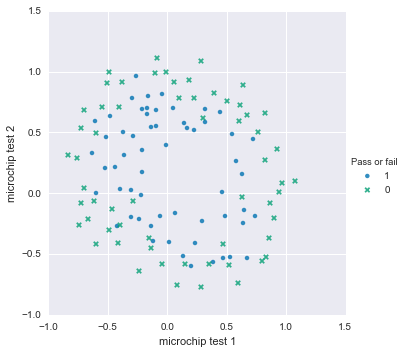

In [35]:
g = sns.lmplot("microchip test 1", "microchip test 2", hue="Pass or fail", data=data2, fit_reg=False, palette = "colorblind", markers = ["o","x"], legend = True)
plt.xlabel("microchip test 1")
plt.ylabel("microchip test 2")

In [57]:
poly = sk.preprocessing.PolynomialFeatures(6)
poly  = poly.fit_transform(X)
poly = pd.DataFrame(poly)
poly.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [37]:
initial_theta = np.zeros([len(poly.columns), 1])
lamb = 1.0

In [52]:
def costreg(theta, X, y , lamb):
    m = float(len(y))
    hypothesis = sigmoid(X.dot(theta).T)
    #this is the regularisation term for logistic regression
    regterm = (lamb/(2*m))*sum(initial_theta[1:]**2)
    
    #this is the cost function for linear regression
    J = -np.sum(y*np.log(hypothesis)+(1-y)*log(1-hypothesis))/m + regterm
    return J

def gradient(theta,X,y, lamb):
    #this returns a vector, which is the gradient of the cost function (partial derivatives of the cost function)
    m = len(y)
    hypothesis = sigmoid(X.dot(theta).T)
    error = hypothesis-y
    
    gradient = []
    for i in range(len(X.columns)):
        if i==0:
            gradient.append(np.sum(error*(X.iloc[:,i]))/m)
        else:
            gradient.append(((np.sum(error*(X.iloc[:,i]))/m)) + (lamb/m)*theta[i])
    return gradient

In [41]:
costreg(initial_theta,poly,y,lamb)

0.69314718055994606

In [51]:
gradient(initial_theta,poly,y,lamb)

AttributeError: 'list' object has no attribute 'flatten'

In [53]:
#optimise values of theta using scipy's minimize function
Result = sp.optimize.minimize(fun = costreg, x0 = initial_theta, args = (poly,y, lamb), method = 'TNC', jac=gradient)
Result.x


array([ 1.27422044,  0.6247865 ,  1.18590383, -2.02173846, -0.9170823 ,
       -1.41319206,  0.12444385, -0.36770505, -0.36458176, -0.18067781,
       -1.46506516, -0.06288689, -0.61999793, -0.27174419, -1.20129297,
       -0.23663774, -0.2090143 , -0.05490406, -0.27804402, -0.29276904,
       -0.46790736, -1.04396483,  0.02082849, -0.29638538,  0.00961561,
       -0.32917181, -0.138042  , -0.93550791])

In [ ]:
costreg(Result.x,poly,y,lamb)

In [ ]:
g = sns.lmplot("microchip test 1", "microchip test 2", hue="Pass or fail", data=data2, fit_reg=False, palette = "colorblind", markers = ["o","x"], legend = True)
plt.xlabel("microchip test 1")
plt.ylabel("microchip test 2")
plot_x = np.array([min(X.iloc[:,2])-2,  max(X.iloc[:,2])+2])
plot_y = (-1./Result.x[2])*(Result.x[1]*plot_x + Result.x[0])
plt.plot(plot_x,plot_y)
plt.ylim(30,100)

In [61]:
w.T

,0,1
0,-1.000000,-1.000000
1,-0.948980,-0.948980
2,-0.897959,-0.897959
3,-0.846939,-0.846939
4,-0.795918,-0.795918
5,-0.744898,-0.744898
6,-0.693878,-0.693878
7,-0.642857,-0.642857
8,-0.591837,-0.591837
9,-0.540816,-0.540816


In [62]:
w = w.T
poly = sk.preprocessing.PolynomialFeatures(6)
poly.fit_transform(w)*Result.x

array([[  1.27422044,  -0.6247865 ,  -1.18590383, ...,  -0.32917181,
         -0.138042  ,  -0.93550791],
       [  1.27422044,  -0.59290964,  -1.12539853, ...,  -0.24041628,
         -0.10082134,  -0.68326426],
       [  1.27422044,  -0.56103278,  -1.06489323, ...,  -0.17256877,
         -0.07236871,  -0.49044131],
       ..., 
       [  1.27422044,   0.87342603,   1.65784514, ...,  -2.45691191,
         -1.03033438,  -6.9825558 ],
       [  1.27422044,   0.90530289,   1.71835044, ...,  -3.04646539,
         -1.27757044,  -8.65806971],
       [  1.27422044,   0.93717975,   1.77885574, ...,  -3.74947266,
         -1.57238466, -10.65601984]])

In [55]:
poly = sk.preprocessing.PolynomialFeatures(6)

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
w = np.vstack([u,v])
z = np.zeros([len(u), len(v)])
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = poly.fit_transform(w.T)*Result.x

KeyboardInterrupt: 

In [ ]:
u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0